# CECS 456 Assignment 2, Due: 9/13/2023
### Name: Justin Chong


1a.

𝑔(𝑤) = 𝑤log (𝑤) + (1 ― 𝑤)log (1 ― 𝑤) where w lies between 0 and 1

g'(w) = 1 + log(w) - 1 + log(1 - w)

g'(w) = log(w) + log(1 - w)
#### Find change in slope at 0:
0 = log(w) + log(1 - w)

0 = log(w) + log(1 - w)

-log(w) = log(1-w)

w = 1 - w

2w = 1

w = $ \frac{1}{2} $ -> Stationary Point





#### Determine type of Stationary Point (Minimum, Maximum, Or Saddle)

g''($\frac{1}{2}$) = $ \frac{1}{w} + \frac{1}{1-w} $

g''($\frac{1}{2}$) = $ \frac{1}{\frac{1}{2}} + \frac{1}{1-\frac{1}{2}} $

g''($\frac{1}{2}$) = 2 + 2 

g''($\frac{1}{2}$) = 4

g''($\frac{1}{2}$) > 0

Since there is a positive slope at the stationary point $\frac{1}{2}$, the **stationary point** is the **minimum** of the function

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

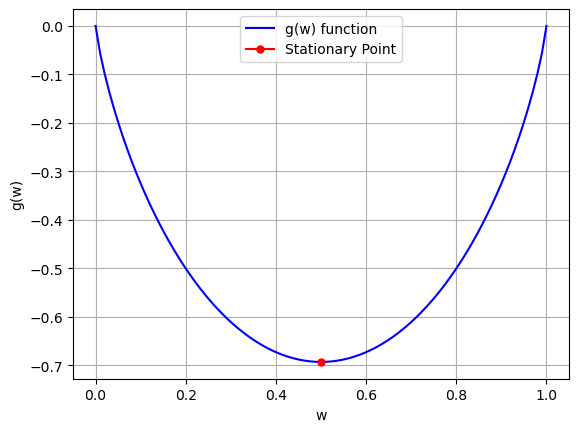

In [8]:
'''Plotting 1a: g(w) and stationary point'''

#function to give g(w)
def g1(w): return w*np.log(w)+(1-w)*np.log(1-w)

#between close to 0 and 1
w_points = np.linspace(1e-10,1-1e-10,100)

plt.grid(True)
plt.plot(w_points,g1(w_points), color="blue", label="g(w) function")

#plot stationary point 1/2
plt.plot(1/2,g1(1/2), color="red", marker="o", markersize=5, label="Stationary Point")

plt.xlabel("w")
plt.ylabel("g(w)")
plt.legend()

1b.

#### Check dimension:
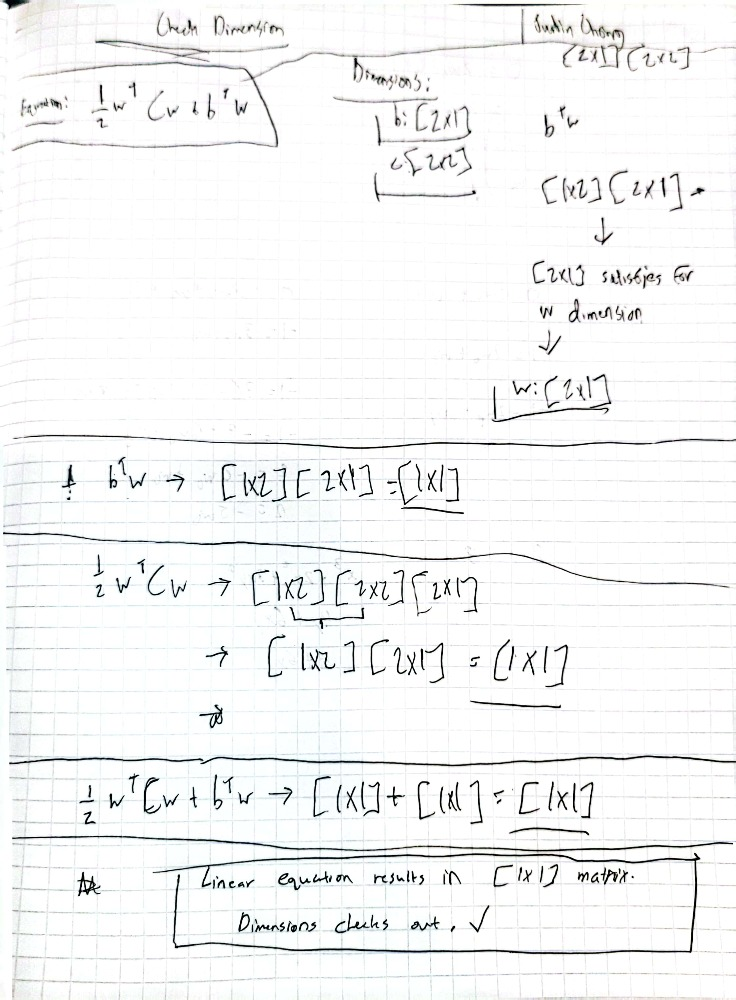

#### Simplify
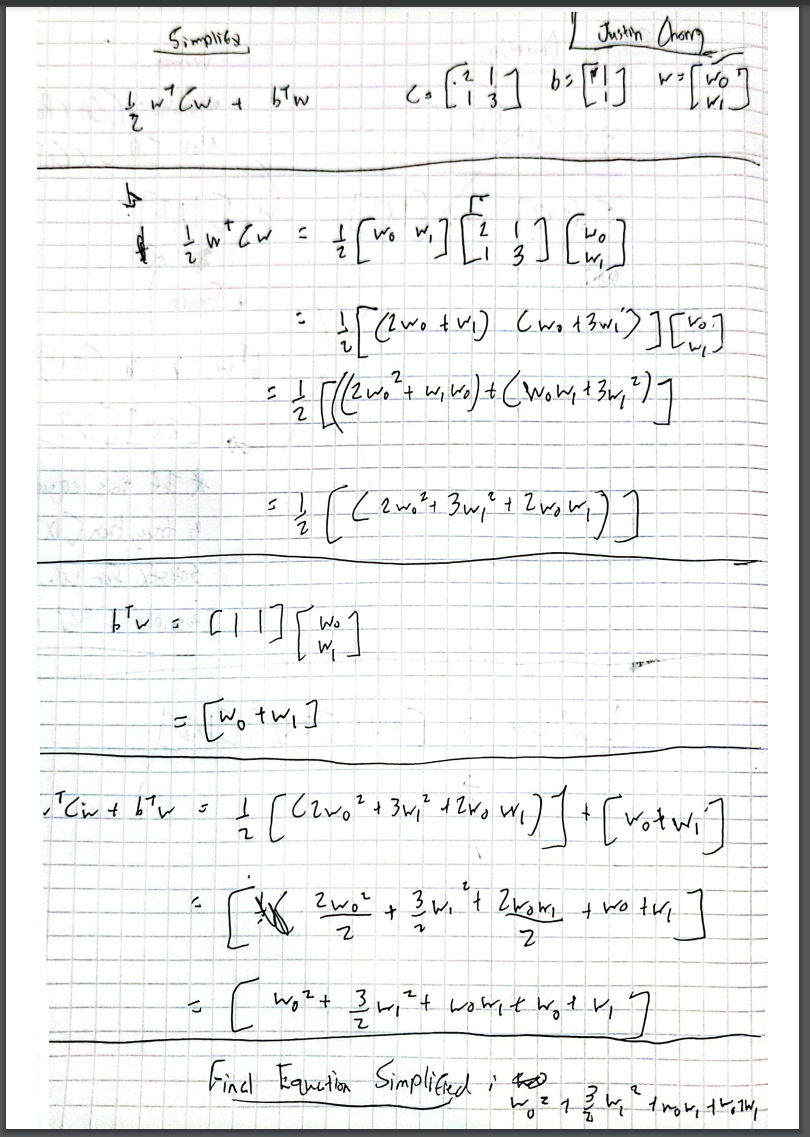


#### Derivative/Find stationary point:
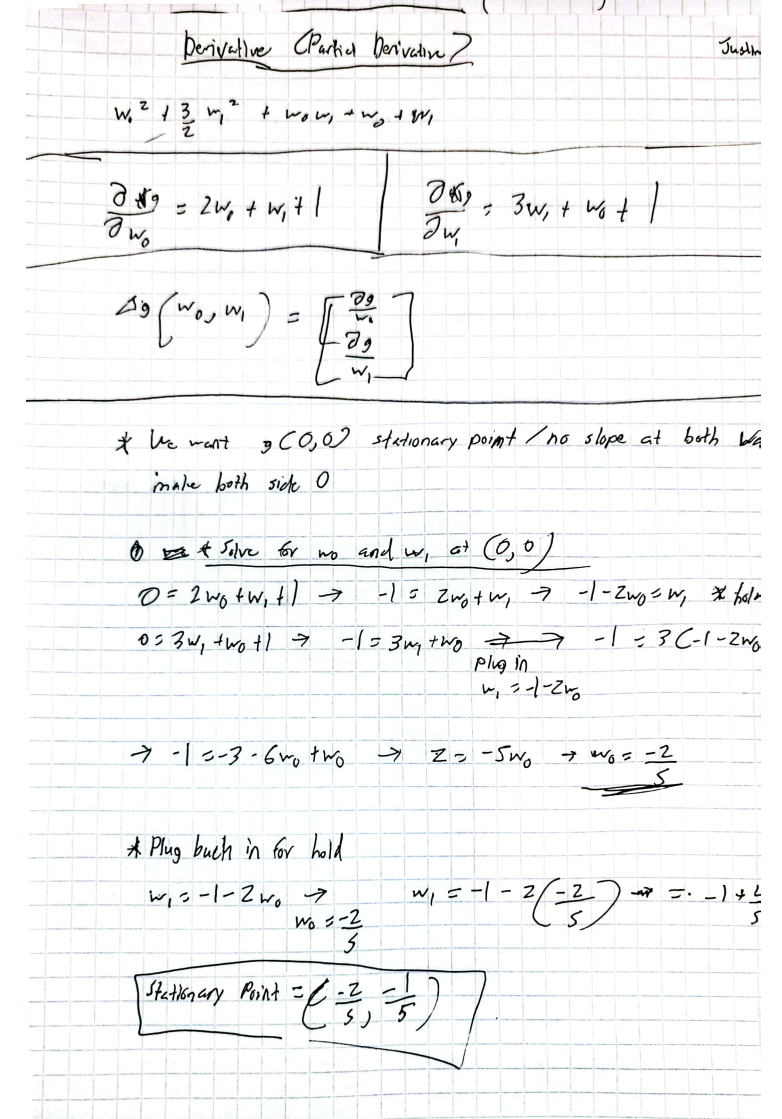


#### Determine stationary point type: 
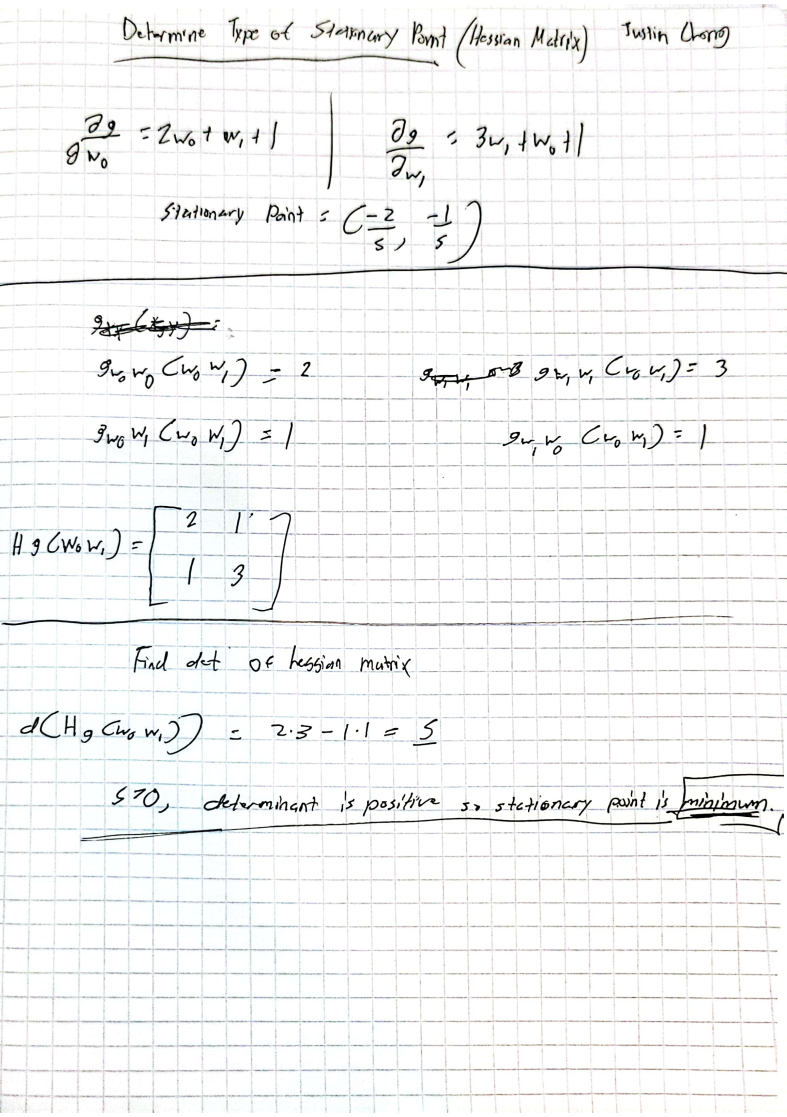

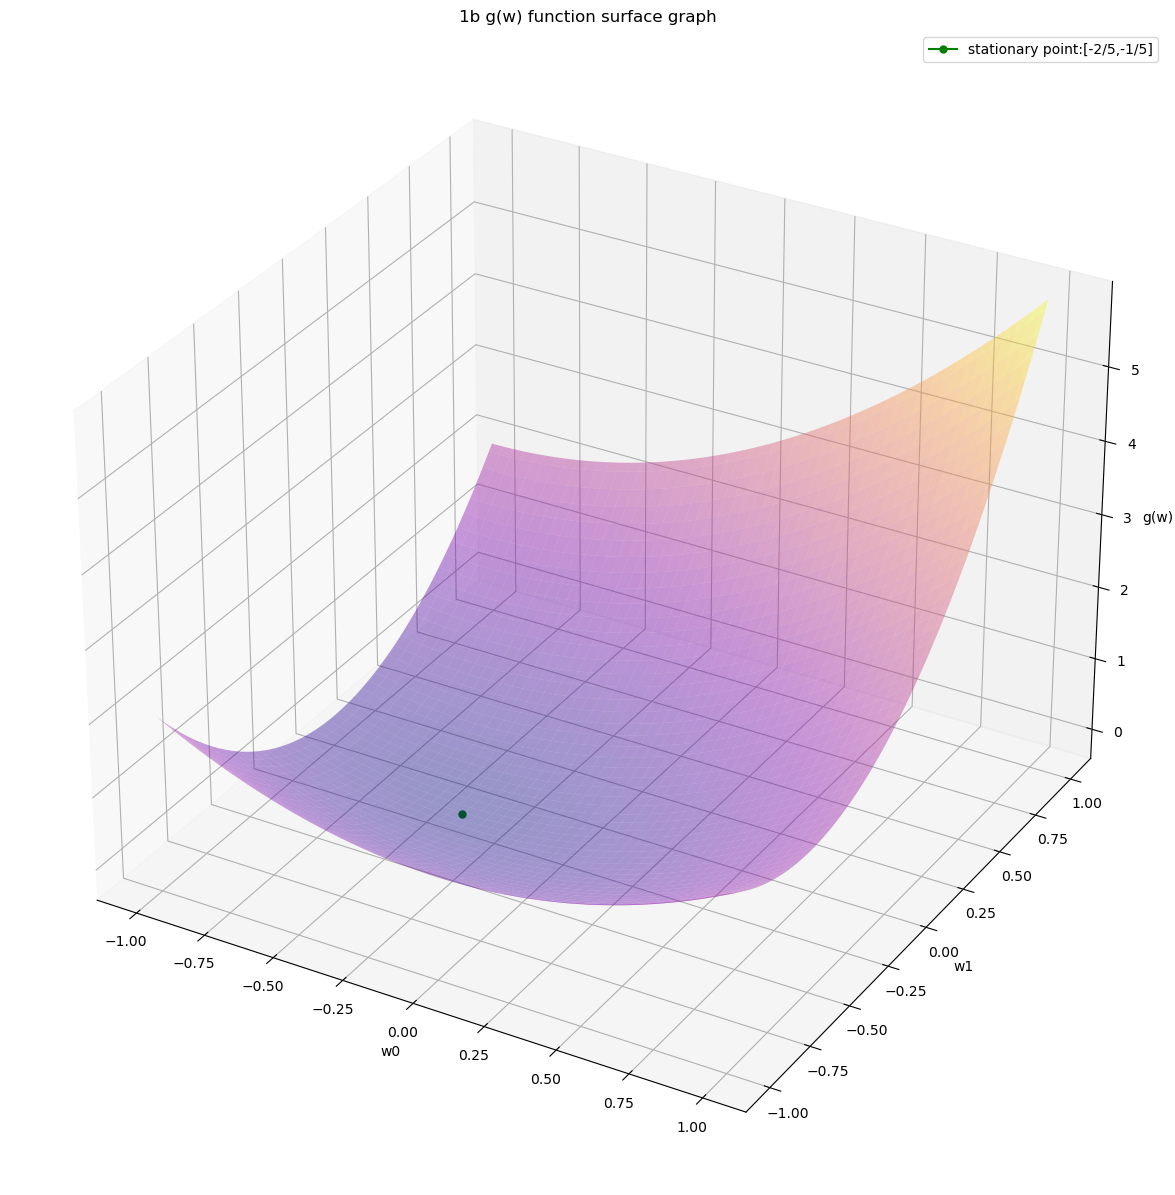

In [104]:
'''Plotting 1b'''

#function to give g(w)
def g2(w0,w1): return 0.5 * (2*w0**2 + 2*w0*w1 + w1**2 + 3*w1**2) + w0 + w1

w0 = np.linspace(-1,1-1e-10, 100)
w1 = np.linspace(-1,1-1e-10, 100)
#meshgrid helps 3d plotting
w0_mesh, w1_mesh = np.meshgrid(w0,w1)

#plots stationary and g(w) surface
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(-2/5,-1/5,g2(-2/5,-1/5),'green', marker='o', markersize=5, label='stationary point:[-2/5,-1/5]')
ax.plot_surface(w0_mesh,w1_mesh,g2(w0_mesh,w1_mesh), cmap='plasma', alpha=.4)

ax.set_title('1b g(w) function surface graph')
ax.set_xlabel("w0")
ax.set_ylabel("w1")
ax.set_zlabel("g(w)")
ax.legend()

2. Gradient Descent algorithm

In [184]:
#sets up necessary functions

def d_g(w): return (1/50)*(4*w**3+2*w+10)
print(d_g(2))
def grad(alpha,K,w0):
    '''
    ---
    parameter:
    alpha - steplength
    K     - maximum number of steps
    w0    - initial point w
    ---
    output:
    history of weights and corresponding function evaluations
    ---
    '''
    w = w0
    #keeping track of history of weights
    history = []
    for k in range(K):
        history.append(d_g(w))
        w = w - alpha*d_g(w)
    return (w, history)

0.92


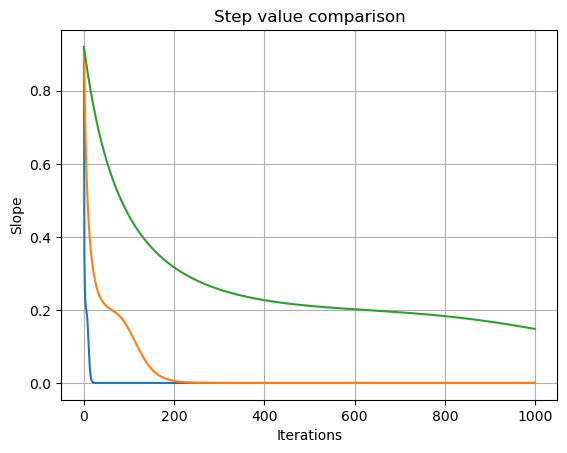

In [199]:
initial_w=2
K=1000
alpha=[1,10**(-1),10**(-2)]

plt.figure()
plt.grid("True")
plt.title("Step value comparison")
plt.xlabel('Iterations')
plt.ylabel('Slope')
for i in range(len(alpha)): 
    final_w, weights_history = grad(alpha[i],K,initial_w)
    plt.plot([i for i in range(1000)],weights_history, label = f'α = {alpha[i]}')

#plt.legend()

Answer: A step value of 0.1 seems to work best compared to all the other values as 1 is too fast (which may overstep and miss the minimum value while 0.01 takes a lot more iteration despite having better accuracy.